## Question 1: Comprehensive Data Acquisition and Preprocessing 
**Task:** 
Download and preprocess CO2 emissions data along with a wide range of socio-economic 
and environmental indicators from the World Bank’s Climate Change database. 
 
**Instructions:** 
1. Access the World Bank database using Python, R, or MATLAB. 
2. Download CO2 emissions data and as many relevant socio-economic and environmental 
indicators as possible (e.g., GDP, population, energy consumption, urbanization rate, 
education level, etc.). 
3. Clean and preprocess the data, addressing missing values, outliers, and ensuring 
consistency across indicators. 
4. Provide a detailed summary of the dataset, including key statistics, correlations between 
variables, and any notable patterns or anomalies

**How to use**
- The API calls aren't working at the moment since I am obtaining a 502 error code from the World Bank Database server.
- You can run all cells, just make sure to uncomment cell 5 if it's the first time you run it.
- Please refer to the deliverables folder and the [q1.md](deliverables/q1.md) file for an overview of the results of this first question.

In [1]:
from helpers import GetData, DataFrameAnalyzer, ManipulateData
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
%load_ext autoreload
%autoreload 2

## 1. Download the Data

In [3]:
data_getter = GetData()

In [4]:
# List of indicator ids that we will use in the project
indicators_id_ls = ['EG.USE.PCAP.KG.OE', 'NY.GDP.MKTP.CD', 'EN.ATM.CO2E.KT', 'SP.POP.TOTL', 'SP.URB.TOTL', 'SE.PRM.CMPT.ZS', 'EG.ELC.RNEW.ZS']
indicators_name_ls = ['en_use', 'gdp', 'cotwo_emi', 'popu_total', 'urban_popu', 'prim_comp_rate', 'ren_elec_out']

# Uncomment the line below to requests the indicator's data to the World Bank API (Not working at the moment since the API returns a 502 Error code)
# data_getter.download_data(indicators_id_ls, 'raw_data')

In [5]:
# Unzip and rename csv files. Uncomment if its the first time you run the notebook

# data_getter.unzip_downloaded_files()
# data_getter.rename_csv_files(indicator_ids=indicators_id_ls)

In [6]:
# Create a dictionary of dataframes
csv_files = {}
for indicator_name, indicator_id in list(zip(indicators_name_ls, indicators_id_ls)):
    print(indicator_name, indicator_id)
    csv_files[indicator_name] = f'raw_data/csv_files/{indicator_id}.csv'

print(csv_files)

data_frames = {var_name: pd.read_csv(file_path, skiprows=4) for var_name, file_path in csv_files.items()}

en_use EG.USE.PCAP.KG.OE
gdp NY.GDP.MKTP.CD
cotwo_emi EN.ATM.CO2E.KT
popu_total SP.POP.TOTL
urban_popu SP.URB.TOTL
prim_comp_rate SE.PRM.CMPT.ZS
ren_elec_out EG.ELC.RNEW.ZS
{'en_use': 'raw_data/csv_files/EG.USE.PCAP.KG.OE.csv', 'gdp': 'raw_data/csv_files/NY.GDP.MKTP.CD.csv', 'cotwo_emi': 'raw_data/csv_files/EN.ATM.CO2E.KT.csv', 'popu_total': 'raw_data/csv_files/SP.POP.TOTL.csv', 'urban_popu': 'raw_data/csv_files/SP.URB.TOTL.csv', 'prim_comp_rate': 'raw_data/csv_files/SE.PRM.CMPT.ZS.csv', 'ren_elec_out': 'raw_data/csv_files/EG.ELC.RNEW.ZS.csv'}


In [7]:
analyzer = DataFrameAnalyzer()

In [8]:
# Prints the shapes of all the loaded dataframes
analyzer.print_shape(data_frames)

Shape of en_use: (266, 69)
Shape of gdp: (266, 69)
Shape of cotwo_emi: (266, 69)
Shape of popu_total: (266, 69)
Shape of urban_popu: (266, 69)
Shape of prim_comp_rate: (266, 69)
Shape of ren_elec_out: (266, 69)


## 2. Data Cleaning

In [9]:
# Creating a subset of countries based on the OECD members to simplify the data cleaning and analysis
manipulate_data = ManipulateData()
data_frames = manipulate_data.create_oecd_country_subset(dataframe_dict=data_frames)

In [10]:
# Checking new shapes
analyzer.print_shape(data_frames)


Shape of en_use: (39, 69)
Shape of gdp: (39, 69)
Shape of cotwo_emi: (39, 69)
Shape of popu_total: (39, 69)
Shape of urban_popu: (39, 69)
Shape of prim_comp_rate: (39, 69)
Shape of ren_elec_out: (39, 69)


In [11]:
# I've focused on checking the CO2 emissions dataset first and we will make adjustments on all the other dfs based on the ones made on this one.
data_frames['cotwo_emi'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Australia,AUS,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,385782.4,394803.6,397149.4,396059.9,395199.1,378996.8,NaN,NaN,NaN,NaN
1,Austria,AUT,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,63254.7,63697.1,65867.7,63131.4,64497.8,59142.4,NaN,NaN,NaN,NaN
2,Belgium,BEL,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,95096.0,94171.6,92587.4,93523.2,92989.4,85364.1,NaN,NaN,NaN,NaN
3,Canada,CAN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,558747.2,556874.1,568175.9,579573.9,566001.8,516873.7,NaN,NaN,NaN,NaN
4,Switzerland,CHE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,39090.8,39666.5,38699.0,37481.3,37376.3,34916.1,NaN,NaN,NaN,NaN


In [12]:
analyzer.print_info(data_frames)

Info of en_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1960            26 non-null     float64
 5   1961            26 non-null     float64
 6   1962            26 non-null     float64
 7   1963            26 non-null     float64
 8   1964            26 non-null     float64
 9   1965            27 non-null     float64
 10  1966            27 non-null     float64
 11  1967            27 non-null     float64
 12  1968            27 non-null     float64
 13  1969            27 non-null     float64
 14  1970            27 non-null     float64
 15  1971            35 non-null     float64
 16  1972            35 non-null     float64
 17  1973            35 no

In [13]:
# Dropping the year columns that are all filled by null values
cotwo_clean_df = data_frames['cotwo_emi'].dropna(axis=1, how='all')
cotwo_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 non-null     float

In [14]:
# Make all other dataframes consistent with the modifications of the CO2 emissions df
data_frames['cotwo_emi'] = cotwo_clean_df
analyzer.check_column_names_equal(dataframes=data_frames)
data_frames = manipulate_data.modify_dataframes_based_on_a_target_dataframe(dataframe_dict=data_frames)

The dataframe en_use has different column names
The dataframe gdp has different column names
- All columns are equal -
The dataframe popu_total has different column names
The dataframe urban_popu has different column names
The dataframe prim_comp_rate has different column names
The dataframe ren_elec_out has different column names


In [15]:
analyzer.check_column_names_equal(data_frames)

- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -


In [16]:
analyzer.print_shape(data_frames)

Shape of en_use: (39, 35)
Shape of gdp: (39, 35)
Shape of cotwo_emi: (39, 35)
Shape of popu_total: (39, 35)
Shape of urban_popu: (39, 35)
Shape of prim_comp_rate: (39, 35)
Shape of ren_elec_out: (39, 35)


In [17]:
analyzer.print_info(data_frames)

Info of en_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 no

In [18]:
# I've noticed that some of the dataframes have a lot of missing values in the latest years (2015 - 2020)
# We are dropping those years and we ensure consitency in all dataframes
data_frames['en_use'] = data_frames['en_use'].dropna(axis=1, how='all')
data_frames = manipulate_data.modify_dataframes_based_on_a_target_dataframe(dataframe_dict=data_frames, target_dataframe_name='en_use')
analyzer.print_shape(data_frames)

Shape of en_use: (39, 30)
Shape of gdp: (39, 30)
Shape of cotwo_emi: (39, 30)
Shape of popu_total: (39, 30)
Shape of urban_popu: (39, 30)
Shape of prim_comp_rate: (39, 30)
Shape of ren_elec_out: (39, 30)


In [19]:
analyzer.print_info(data_frames)

Info of en_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 no

In [20]:
# The remaining missing values are imputed using interpolation
data_frames = manipulate_data.impute_data(data_frames)
analyzer.print_info(data_frames)

Info of en_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 no

In [21]:
analyzer.print_describe(data_frames)

Description of en_use:


              1990         1991         1992         1993         1994  \
count    39.000000    39.000000    39.000000    39.000000    39.000000   
mean   3815.908325  3802.904674  3674.589806  3681.960581  3702.826193   
std    2063.977806  2032.138684  1967.442691  2021.395422  2025.409273   
min     531.126860   549.446289   691.794762   688.600834   662.147135   
25%    2522.176764  2519.371811  2482.357776  2476.832915  2421.350357   
50%    3597.051621  3637.194120  3561.890369  3490.886554  3494.447149   
75%    4803.404363  4765.752251  4392.849372  4340.151468  4358.144295   
max    8907.791984  9353.421189  9262.081979  9266.942575  8823.252466   

              1995         1996         1997         1998          1999  ...  \
count    39.000000    39.000000    39.000000    39.000000     39.000000  ...   
mean   3723.976049  3852.558907  3856.095682  3857.677351   3883.364591  ...   
std    1935.261483  1993.718647  1953.911547  1965.166690   2073.491474  ...   
min     659.8

## 3. Data Analysis

In [22]:
# Create a new dataframe with the OECD members data for each indicator for further analysis
oecd_data_df = manipulate_data.create_oecd_dataframe(data_frames)
oecd_data_df.head()


,en_use,gdp,cotwo_emi,popu_total,urban_popu,prim_comp_rate,ren_elec_out
1990,4141.578265,1.884697e+13,11344058.36,1.104792e+09,806920692.0,96.470642,17.517699
1991,4148.818678,1.995376e+13,11389105.28,1.115757e+09,818086250.0,96.054222,17.156024
1992,4146.560828,2.146475e+13,11422717.80,1.126417e+09,828873390.0,97.559067,17.032222
1993,4169.720783,2.179581e+13,11511913.66,1.136605e+09,839411038.0,97.351517,17.688809
1994,4204.493628,2.329764e+13,11707010.04,1.146215e+09,849629868.0,97.834900,16.770369


In [23]:
oecd_data_df.describe()

,en_use,gdp,cotwo_emi,popu_total,urban_popu,prim_comp_rate,ren_elec_out
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000
mean,4276.778525,3.410616e+13,1.240324e+07,1.221924e+09,9.374380e+08,99.028402,17.477318
std,143.465971,1.077958e+13,5.959833e+05,6.866032e+07,7.998576e+07,1.276751,2.253925
min,4026.650028,1.884697e+13,1.134406e+07,1.104792e+09,8.069207e+08,96.054222,15.060698
25%,4142.823906,2.570470e+13,1.206873e+07,1.167004e+09,8.718091e+08,98.474457,15.872453
50%,4301.557011,3.029353e+13,1.248465e+07,1.222910e+09,9.361024e+08,98.903728,17.060931
75%,4403.203181,4.484386e+13,1.288379e+07,1.280268e+09,1.006598e+09,100.060101,17.727429
max,4476.109157,5.038691e+13,1.328968e+07,1.330317e+09,1.064137e+09,100.941177,23.335963


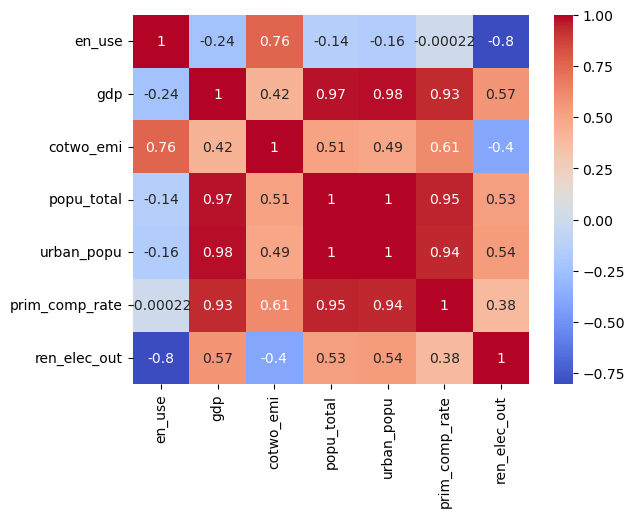

In [24]:
sns.heatmap(oecd_data_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [25]:
oecd_data_df.corr()

,en_use,gdp,cotwo_emi,popu_total,urban_popu,prim_comp_rate,ren_elec_out
en_use,1.000000,-0.236418,0.756907,-0.141271,-0.163088,-0.000218,-0.804902
gdp,-0.236418,1.000000,0.424920,0.973795,0.979074,0.930858,0.569083
cotwo_emi,0.756907,0.424920,1.000000,0.510288,0.492022,0.614550,-0.396383
popu_total,-0.141271,0.973795,0.510288,1.000000,0.999469,0.947026,0.527073
urban_popu,-0.163088,0.979074,0.492022,0.999469,1.000000,0.942910,0.540428
prim_comp_rate,-0.000218,0.930858,0.614550,0.947026,0.942910,1.000000,0.383124
ren_elec_out,-0.804902,0.569083,-0.396383,0.527073,0.540428,0.383124,1.000000


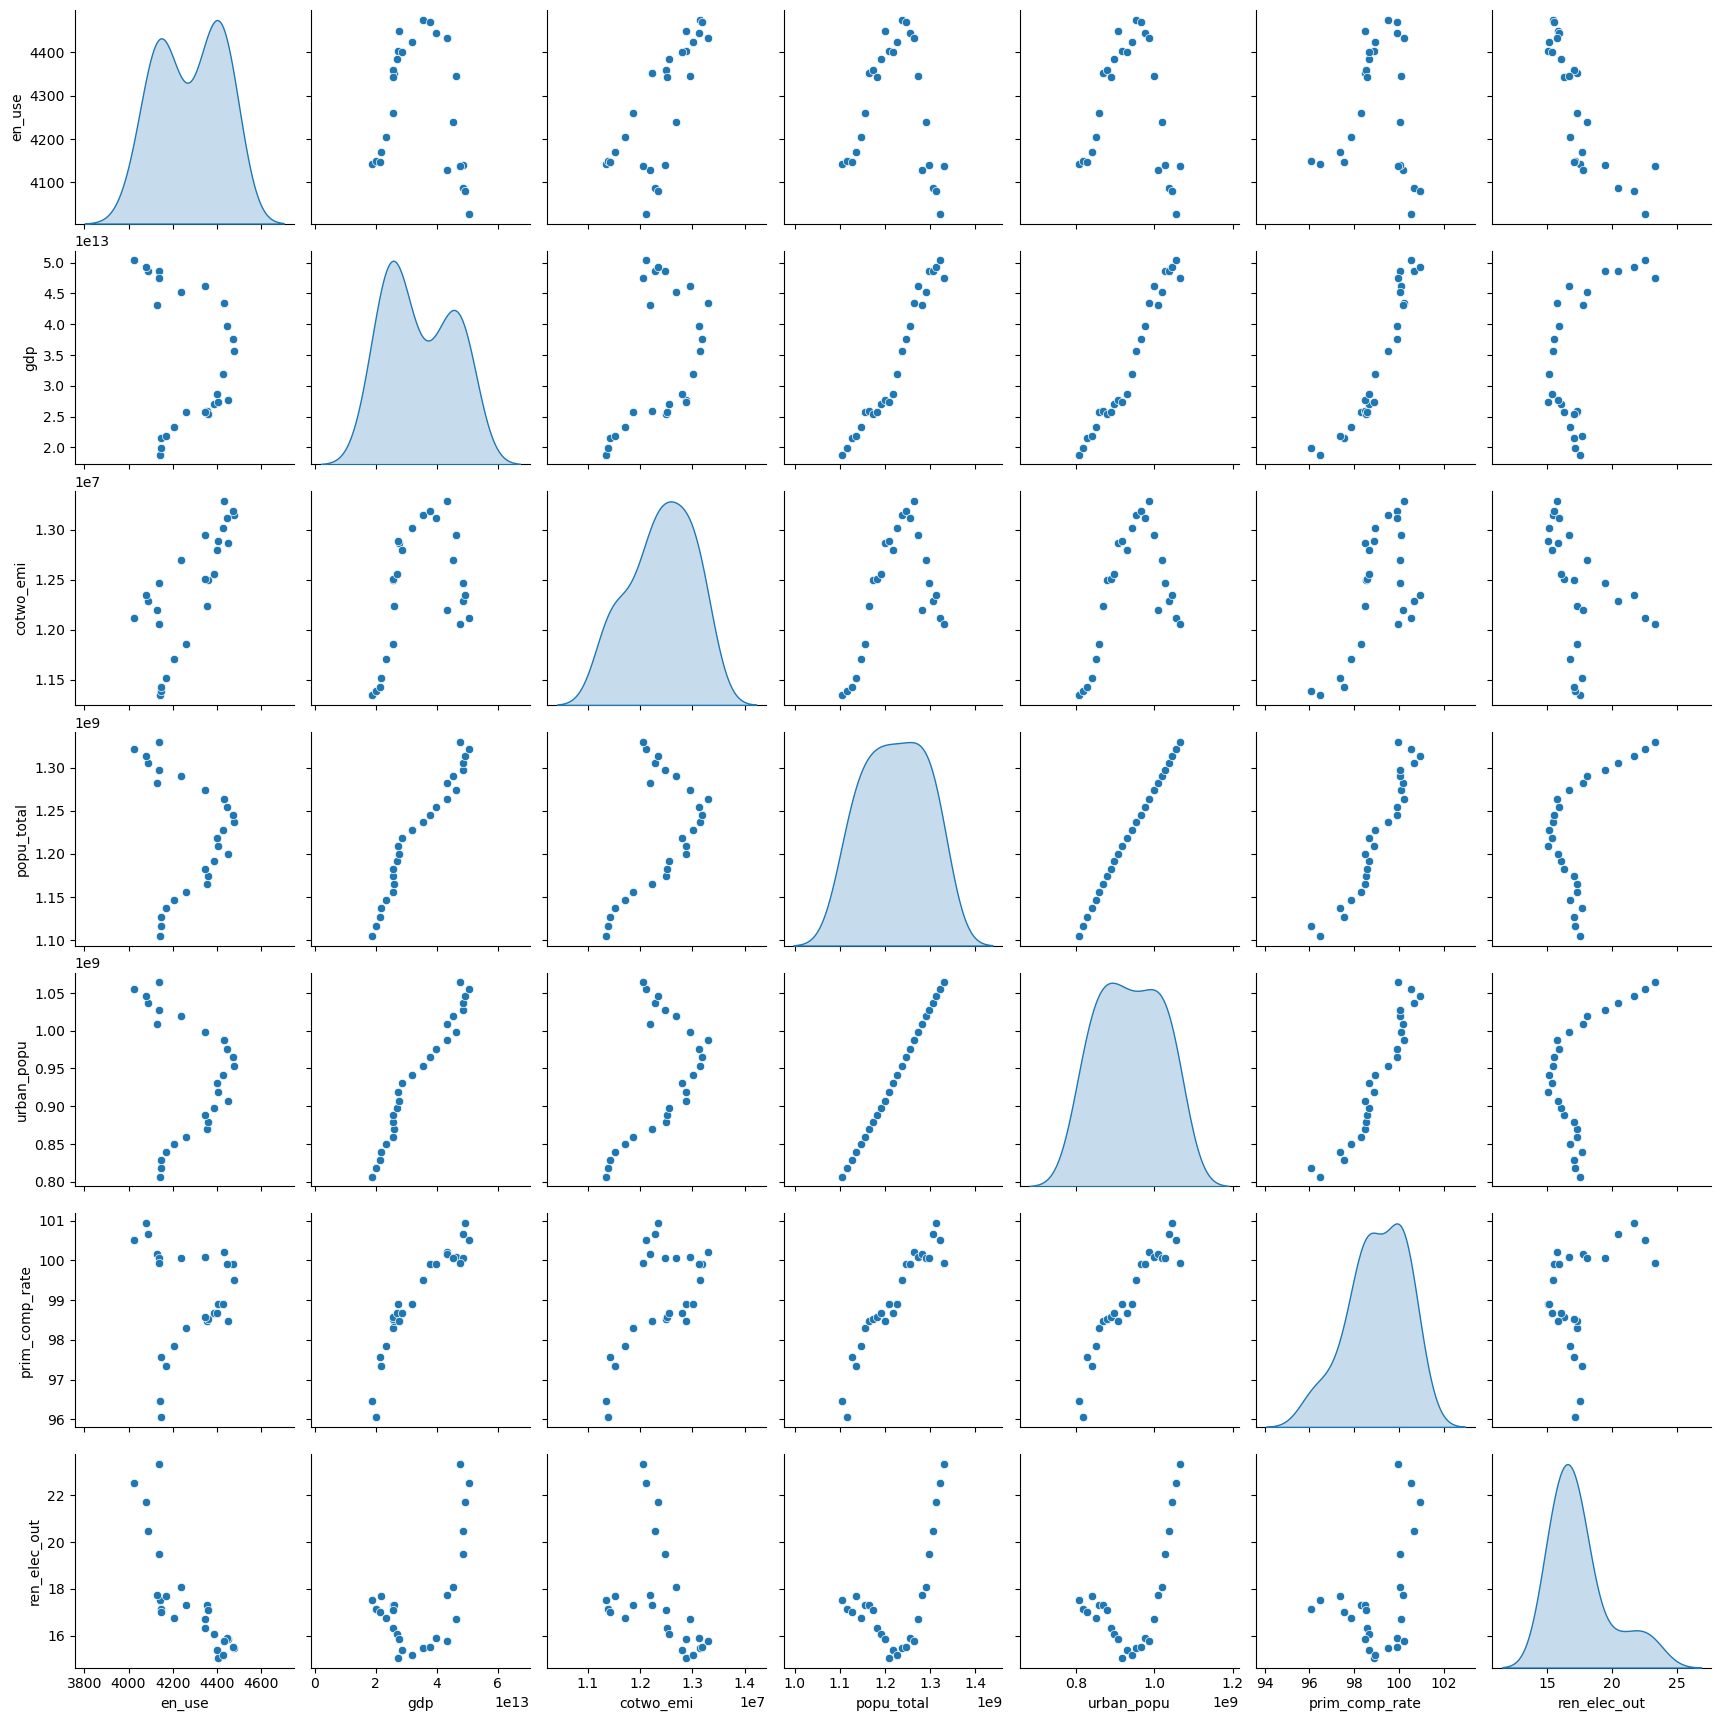

In [26]:
sns.pairplot(oecd_data_df, diag_kind='kde')
plt.show()

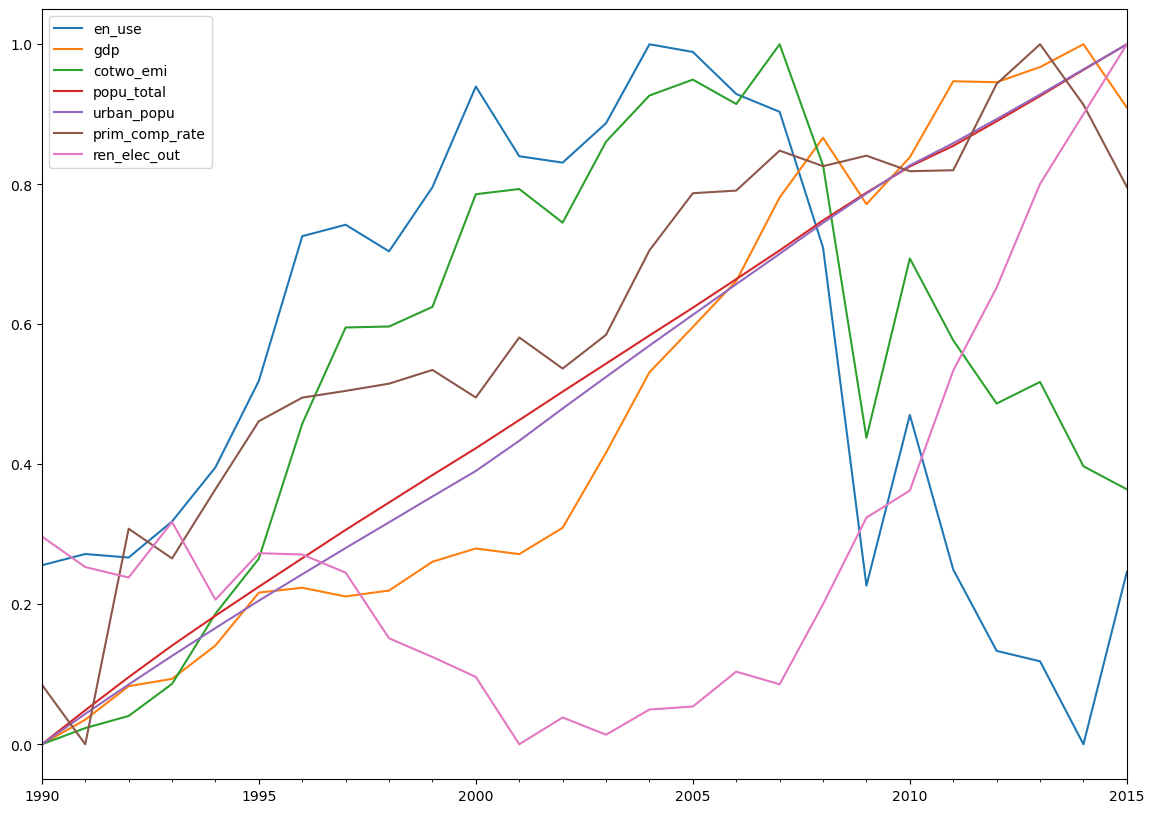

In [27]:
min_max_scaler = MinMaxScaler()
oecd_norm_df = pd.DataFrame(min_max_scaler.fit_transform(oecd_data_df), columns=oecd_data_df.columns, index=oecd_data_df.index)

oecd_norm_df.index = pd.to_datetime(oecd_data_df.index, format='%Y')
oecd_norm_df.plot(figsize=(14, 10))
plt.legend(loc='best')
plt.show()


In [28]:
# Uncomment if you want to save the csv files for each indicator
# manipulate_data.df_to_csv_all(data_frames)

## 4. Prepare DataFrame for Q2 and Q4

In [29]:
data_frames = manipulate_data.drop_oecd_members_rows(data_frames) # Eliminates the oecd members aggregate row from all dataframes
cotwo_df_labeled = manipulate_data.q4_create_target_variable(cotwo_df=data_frames['cotwo_emi'], start='2005', end='2015') # Creates a labeled version of the CO2 emissions df
data_frames = manipulate_data.drop_indicator_data_cols(data_frames) # Eliminates the Indicator Name and Indicator Code columns in each dataframe
data_frames = manipulate_data.add_suffix_to_cols(data_frames)
analyzer.print_head(data_frames)


First 5 rows of en_use:
  Country Name  1990_en_use  1991_en_use  1992_en_use  1993_en_use  \
0    Australia  5061.500154  4927.771326  4963.858162  5156.933379   
1      Austria  3240.111359  3415.173082  3245.592076  3255.784704   
2      Belgium  4809.867268  5006.004706  5040.670440  4902.269974   
3       Canada  7630.092306  7517.330304  7601.685177  7770.546448   
4  Switzerland  3627.692811  3637.194120  3613.284329  3490.886554   

   1994_en_use  1995_en_use  1996_en_use  1997_en_use  1998_en_use  ...  \
0  5103.947956  5148.344210  5419.101106  5497.496585  5584.519194  ...   
1  3234.492985  3373.603565  3580.420798  3550.404171  3606.610379  ...   
2  5186.186627  5267.670671  5536.471275  5523.459164  5603.160264  ...   
3  7957.245633  7979.898446  8053.454858  8056.243628  7948.397278  ...   
4  3494.447149  3421.651041  3473.206304  3525.891301  3557.990076  ...   

   2006_en_use  2007_en_use  2008_en_use  2009_en_use  2010_en_use  \
0  5778.281818  5868.340898  5964.

In [30]:
# Creates the target value series for q4 dataset
q4_target_value_series = cotwo_df_labeled['Target'].copy()

In [31]:
analyzer.print_unique_values(data_frames, 'Country Name')

Country Name unique values:
['Australia' 'Austria' 'Belgium' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland'
 'France' 'United Kingdom' 'Greece' 'Hungary' 'Ireland' 'Iceland' 'Israel'
 'Italy' 'Japan' 'Korea, Rep.' 'Lithuania' 'Luxembourg' 'Latvia' 'Mexico'
 'Netherlands' 'Norway' 'New Zealand' 'Poland' 'Portugal'
 'Slovak Republic' 'Slovenia' 'Sweden' 'Turkiye' 'United States']


Country Name unique values:
['Australia' 'Austria' 'Belgium' 'Canada' 'Switzerland' 'Chile' 'Colombia'
 'Costa Rica' 'Czechia' 'Germany' 'Denmark' 'Spain' 'Estonia' 'Finland'
 'France' 'United Kingdom' 'Greece' 'Hungary' 'Ireland' 'Iceland' 'Israel'
 'Italy' 'Japan' 'Korea, Rep.' 'Lithuania' 'Luxembourg' 'Latvia' 'Mexico'
 'Netherlands' 'Norway' 'New Zealand' 'Poland' 'Portugal'
 'Slovak Republic' 'Slovenia' 'Sweden' 'Turkiye' 'United States']


Country Name unique values:
['Australia' 'Austria' 'Belgium' 'Canada' 'Switzerland' 'Chile' 'Colombi

In [32]:
all_indicators_df = manipulate_data.merge_all_indicators(dataframe_dict=data_frames)
all_indicators_df['reduced_cotwo_emi'] = q4_target_value_series.copy()

In [33]:
all_indicators_df.head()

,Country Name,1990_en_use,1991_en_use,1992_en_use,1993_en_use,1994_en_use,1995_en_use,1996_en_use,1997_en_use,1998_en_use,...,2007_ren_elec_out,2008_ren_elec_out,2009_ren_elec_out,2010_ren_elec_out,2011_ren_elec_out,2012_ren_elec_out,2013_ren_elec_out,2014_ren_elec_out,2015_ren_elec_out,reduced_cotwo_emi
0,Australia,5061.500154,4927.771326,4963.858162,5156.933379,5103.947956,5148.344210,5419.101106,5497.496585,5584.519194,...,8.648072,8.115258,7.497934,8.611880,10.426652,10.592653,13.264108,14.906712,13.637841,0
1,Austria,3240.111359,3415.173082,3245.592076,3255.784704,3234.492985,3373.603565,3580.420798,3550.404171,3606.610379,...,68.687029,69.230888,71.139695,66.211323,65.631423,74.529181,78.024787,81.056868,76.490779,1
2,Belgium,4809.867268,5006.004706,5040.670440,4902.269974,5186.186627,5267.670671,5536.471275,5523.459164,5603.160264,...,3.982726,5.285764,6.056388,6.920806,9.410879,12.812879,14.209386,17.080641,20.800023,1
3,Canada,7630.092306,7517.330304,7601.685177,7770.546448,7957.245633,7979.898446,8053.454858,8056.243628,7948.397278,...,60.296272,61.472527,62.850347,61.396757,62.338250,63.230561,63.298033,62.824992,63.011450,0
4,Switzerland,3627.692811,3637.194120,3613.284329,3490.886554,3494.447149,3421.651041,3473.206304,3525.891301,3557.990076,...,54.906004,55.679038,55.544223,56.729546,54.092991,59.474611,59.193830,58.015463,62.197982,1


In [34]:
all_indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 184 entries, Country Name to reduced_cotwo_emi
dtypes: float64(182), int64(1), object(1)
memory usage: 54.8+ KB


In [35]:
# Create last Dataframe transformation to save it as a CSV file
all_indicators_df_long = pd.melt(all_indicators_df, id_vars=["Country Name", "reduced_cotwo_emi"], var_name="Year", value_name="Value")
all_indicators_df_long['Indicator Name'] = all_indicators_df_long['Year'].str.split('_',n=1, expand=True)[1]
all_indicators_df_long['Year'] = all_indicators_df_long['Year'].str.split('_', expand=True)[0]
all_indicators_df_long.to_csv('clean_data/initial_q4.csv', index=False)
all_indicators_df_long.head()


,Country Name,reduced_cotwo_emi,Year,Value,Indicator Name
0,Australia,0,1990,5061.500154,en_use
1,Austria,1,1990,3240.111359,en_use
2,Belgium,1,1990,4809.867268,en_use
3,Canada,0,1990,7630.092306,en_use
4,Switzerland,1,1990,3627.692811,en_use


In [36]:
all_indicators_df_long = all_indicators_df_long.drop(columns=['reduced_cotwo_emi'])
all_indicators_df_long.to_csv('clean_data/initial_q2.csv', index=False)
all_indicators_df_long.head()

,Country Name,Year,Value,Indicator Name
0,Australia,1990,5061.500154,en_use
1,Austria,1990,3240.111359,en_use
2,Belgium,1990,4809.867268,en_use
3,Canada,1990,7630.092306,en_use
4,Switzerland,1990,3627.692811,en_use
